In [1]:
from random import shuffle, randint, choice
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

$A \rightarrow car \space behind \space first(1) \space or \space second(2) \space or \space third(3) \space door$

$B \rightarrow opened \space  door \space  is: \space  \#1 \space  or \space  \#2 \space  or \space  \#3 $


### STRATEGY: don't change door
$$P(car=1) = P(car=2) = P(car=3) = \frac{1}{3}$$

### STRATEGY: change door

$P(A=1 | B=2)$ - probability that CAR is behind door #1, and QUIZ HOST opens door #2 (so first we choosed door #3), we have opportunity to change door

$$P(A=1 | B=2) = \frac{P(A=1) \times P(B=2 | A=1)}{P(B=2)} \\\ P(A=1) = \frac{1}{3} \\\ P(B=2|A=1) = 1 \\\ P(B=2) = \sum_{i=1}^{3}P(B=2, A=i) = \\\ = P(B=2, A=1) \times P(A=1) + \\\ + P(B=2, A=2) \times P(A=2) + \\\ + P(B=2, A=3) \times P(A=3) = \\\ = 1 \times \frac{1}{3} + 0 \times \frac{1}{3} + \frac{1}{2} \times \frac{1}{3}  = \frac{1}{3} + \frac{1}{6} = \\\ = \frac{1}{2} \\\ P(A=1 | B=2) = \frac{\frac{1}{3} \times 1}{\frac{1}{2}} = \frac{1}{3} \times \frac{2}{1} = \frac{2}{3}$$

In [2]:
class Door:
    def __init__(self, prize):
        self.prize = prize
        
        self.is_choosen = False
        self.is_useless = False
        self.is_final_choice = False
        
    def choose(self):
        self.is_choosen = True
    
    def unchoose(self):
        self.is_choosen = False
    
    def point_as_useless(self):
        self.is_useless = True
    
    def make_final(self):
        self.is_final_choice = True
        
    def __str__(self):
        return f"{self.prize} {'❓' if self.is_choosen else ' '} {'🟨' if self.is_useless else '  '} {'👈' if self.is_final_choice else ' '}"

In [3]:
class Game:
    huge_prize = "CAR"
    small_prize = "GOAT"
    def __init__(self, decision="change", num=3):

        self.decision = decision
        self.num = num
        
        self.already_changed_decision = False
        
        self.scene = {}
        self.create_scene()  # Creates RANDOM DOORS

        self.make_choice()  # Select a DOOR
        
        self.make_tip()
        
        if self.decision == 'change':
            self.change_decision()
        

    def show(self):
        print("DOORS:")
        for i, d in self.scene.items():
            print(f"{i}: {d}")
        print()
        
    def make_choice(self):
        door_num = choice(range(1, self.num+1))
        if self.decision == 'change':
            self.scene[door_num].choose()
        elif self.decision == 'stay':
            self.scene[door_num].make_final()
    
    def change_decision(self):
        curr_door_num = None
        
        for num, door in self.scene.items():
            if door.is_choosen:
                curr_door_num = num
                
        for num, door in self.scene.items():
            if not door.is_useless and not door.is_choosen:
                door.make_final()
        
    def make_tip(self):
        for num, door in self.scene.items():
            if door.prize != self.huge_prize and not door.is_choosen and not door.is_final_choice:
                door.point_as_useless()
                break
    
    def check(self):
        for num, door in self.scene.items():
            if door.is_final_choice:
                return True if door.prize == self.huge_prize else False
    
    def create_scene(self):
        doors = []
        doors.append( Door(self.huge_prize) )
        for _ in range(self.num - 1):
            doors.append(Door( self.small_prize) )
        shuffle(doors)
        
        for i, d in enumerate(doors):
            self.scene[i+1] = d

In [4]:
def monte_carlo_simulation(number, decision):
    result = []
    for i in range(number):
        new_game = Game(decision)
        result.append(new_game.check())
    return sum(result) / number

In [5]:
sim_start = 1
sim_end = 1000

result_change = []
result_stay = []
X = list(range(sim_start, sim_end))
for i in tqdm(range(sim_start, sim_end)):
    result_change.append(monte_carlo_simulation(i, 'change'))
    result_stay.append(monte_carlo_simulation(i, 'stay'))
result_change = np.array(result_change)
result_stay = np.array(result_stay)


mean_change = result_change.mean()
mean_stay = result_stay.mean()

100%|███████████████████████████████████████████████████████████████████████████████| 999/999 [00:06<00:00, 156.97it/s]


### Plotting

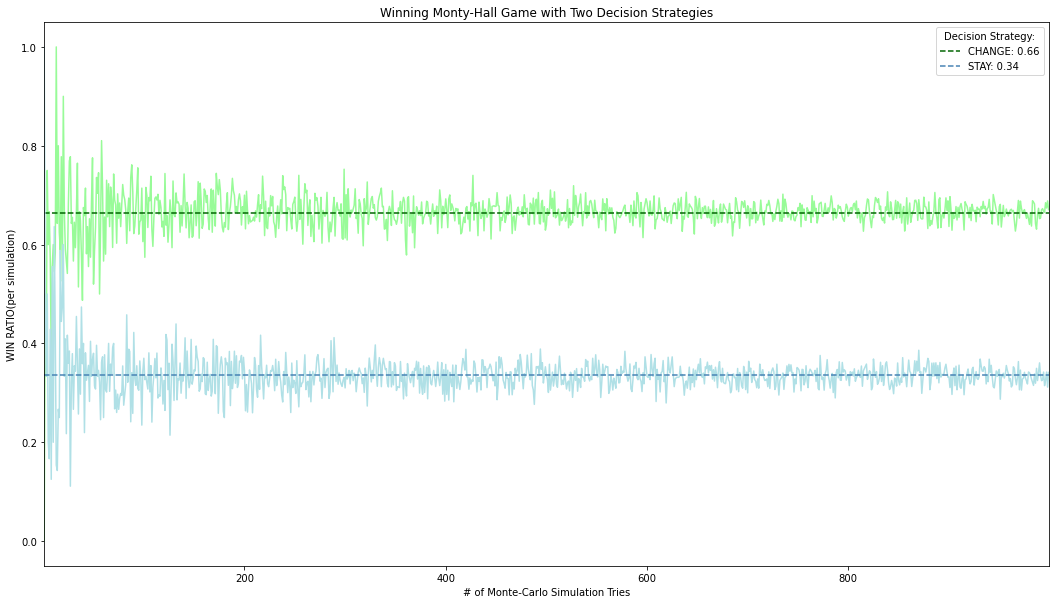

In [6]:
plt.figure(figsize=(18, 10))

plt.title("Winning Monty-Hall Game with Two Decision Strategies")
plt.ylabel("WIN RATIO(per simulation)")
plt.xlabel("# of Monte-Carlo Simulation Tries")


plt.plot(X, result_change, color="palegreen")
plt.axhline(mean_change, linestyle = '--', color='darkgreen', 
            label=f"CHANGE: {round(mean_change, 2)}")

plt.plot(X, result_stay, color="powderblue")
plt.axhline(mean_stay, linestyle = '--', color='steelblue', 
            label=f"STAY: {round(mean_stay, 2)}")

plt.xlim(X[0], X[-1])

plt.legend(title="Decision Strategy:")
plt.show()